# Calorie Analysis
## Questions
- How many average calories am I burning each day?
- Stacked bar chart: resting vs active calories each day = total each day
- What is the total number of calories I'm burning each week?
- Weekly Avg Active + Weekly Avg Resting = Weekly AVg Total e.g 1090 Weekly Avg Active + 21-6 Weekly Avg Resting = 3196 Weekly Avg Total

In [238]:
# An analysis on calories burnt by activity type - 
import pandas as pd
import matplotlib.pyplot as plt

# What week is it?
week = "Week 46"

# Try to import the CSV file, handling potential errors
try:
    # Import in CSV file and skip the first row
    calories = pd.read_csv('Week 46/Calories.csv')
    new_column_names = ['Date', 'Active Calories', 'Resting Calories', 'Total']
    
    # Ensure the number of new column names matches the number of columns in the DataFrame
    if len(new_column_names) == len(calories.columns):
        calories.columns = new_column_names
    else:
        print("Error: The number of new column names does not match the number of columns in the DataFrame")

    # Set 'Date' as the index so that xticks become the 'Date' rather than the 0, 1, 2 etc index.
    calories.set_index('Date', inplace=True)

    print(calories)
except FileNotFoundError:
     print("The specified file was not found.")


        Active Calories  Resting Calories  Total
Date                                            
Nov 12             2197              2161   4358
Nov 13              611              2161   2772
Nov 14              905              2161   3066
Nov 15             1037              2161   3198
Nov 16             1237              2161   3398
Nov 17              432              2161   2593
Nov 18             1201              1305   2506


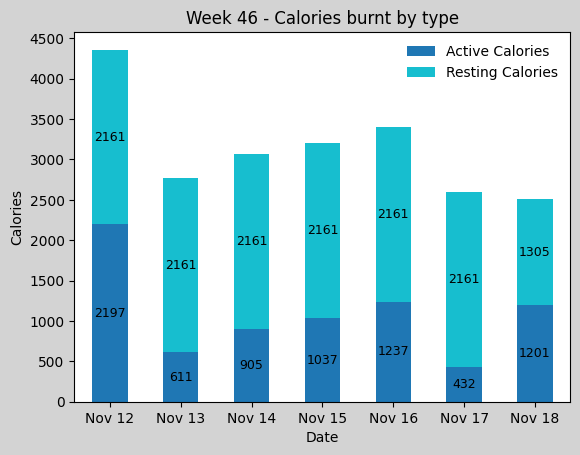

In [239]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

# Rename the dataframe for easy usage
df = calories

# Ignore 'Total' calories for the sake of the graph
df_without_total = df.drop('Total', axis=1) # axis=1 specifies that you want to drop a column, not a row.

# Stacked bar chart - https://matplotlib.org/stable/users/explain/colors/colormaps.html
ax = df_without_total.plot(kind='bar', stacked=True, colormap='tab10')

# Add the value of calories to each bar:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', 
            size=9)


# Set the background color of the entire figure
fig = plt.gcf()
fig.set_facecolor('lightgrey')

# Set the color of the graph itself
ax.set_facecolor('white')

# Edit the legend
ax.legend(loc='upper right', frameon=False)#, ncol=3)

# Label axis'
plt.xlabel('Date', color='black')
plt.ylabel('Calories', color='black')
plt.title(week + ' - Calories burnt by type', color='black')

# Customize x, y ticks
plt.xticks(rotation=0, color='black')

# Customize y-axis to display every 500 calories
max_calories = df_without_total.sum(axis=1).max()  # Find the maximum sum of calories
ytick_values = range(0, int(max_calories) + 500, 500)  # Create a range of values from 0 to max, stepping by 500
plt.yticks(ytick_values, color='black')

# Show me the dam thing
plt.show()

# Math Time

In [240]:
# On average, how many calories am I burning each day?
average_daily_calories = round(df['Total'].mean(), 1)
#print(average_daily_calories)

# How many average ACTIVE calories am I burning each day?
average_active_calories = round(df['Active Calories'].mean(), 1)
#print(average_active_calories)

# How many average RESTING calories am I burning each day?
average_resting_calories = round(df['Resting Calories'].mean(), 1)
#print(average_resting_calories)

# What is the total number of calories I'm burning each week?
total_calories_burnt = round(df['Total'].sum(), 1)
#print(total_calories_burnt)

Description = 'You burnt a total of ' + str(total_calories_burnt) + ' calories this week. On average, that is about ' + str(average_daily_calories) + ' per day.' + '\n\n' + 'Where typically, ' + str(average_active_calories) + ' of those calories were actively burnt and ' + str(average_resting_calories) + ' were burnt resting.'

print(Description)








You burnt a total of 21891 calories this week. On average, that is about 3127.3 per day.

Where typically, 1088.6 of those calories were actively burnt and 2038.7 were burnt resting.
